# Текст и поясняющие надписи

Хорошая визуализация должна рассказывать читателю историю. В некоторых случаях это можно сделать только визуальными средствами, без дополнительного текста, но иногда небольшие текстовые подсказки и метки необходимы. Вероятно, простейший вид поясняющих надписей — метки на осях координат и их названия, но имеющиеся возможности гораздо шире. Рассмотрим на примере каких-нибудь данных, как можно их визуализировать и добавить поясняющие надписи, чтобы облегчить донесение до читателя полезной информации. Начнем с настройки блокнота для построения графиков и импорта необходимых нам функций:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

## Пример: влияние выходных дней на рождение детей в США

Данные можно скачать по адресу https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv.

In [2]:
births = pd.read_csv(r'CSV\births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

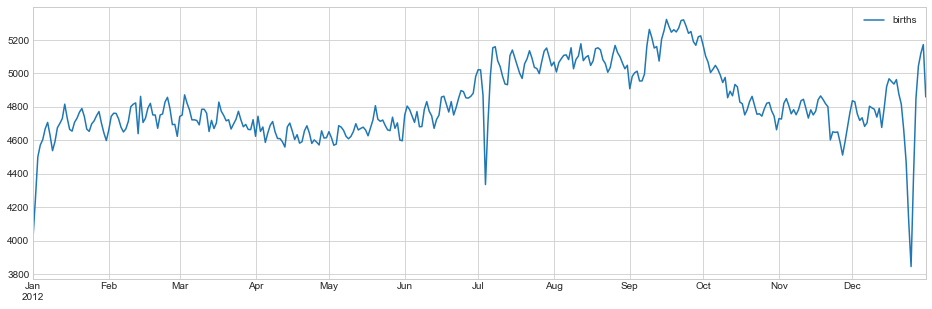

In [3]:
fig, ax = plt.subplots(figsize=(16, 5))
births_by_date.plot(ax=ax);

При работе с данными подобным образом часто бывает полезно снабдить элементы графика пояснениями для привлечения к ним внимания читателя. Это можно сделать вручную с помощью команды plt.text/ax.text, которая поместит текст в месте, соответствующем конкретным значениям координат (x, y):

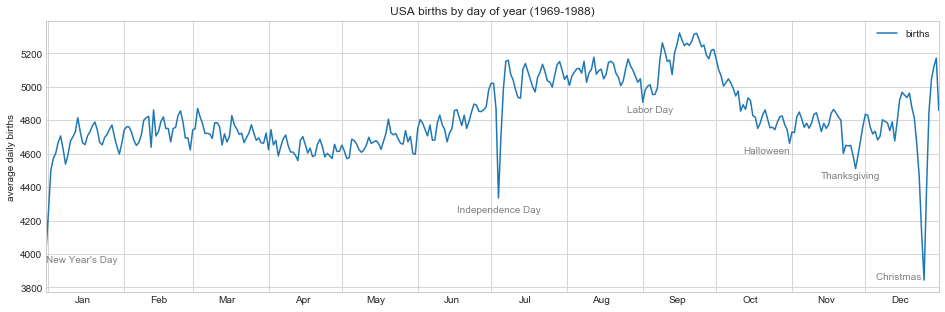

In [4]:
fig, ax = plt.subplots(figsize=(16, 5))
births_by_date.plot(ax=ax)

style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# добавляем метки для осей координат
ax.set(title='USA births by day of year (1969-1988)', 
       ylabel='average daily births')

# Размечаем ось X центрированными метками для месяцев
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

Метод ax.text принимает на входе координату x, координату y, строковое значение и необязательные ключевые слова, задающие цвет, размер, стиль, выравнивание и другие свойства текста. В данном случае мы использовали значения ha='right' и ha='center', где ha — сокращение от horizontal alignment («выравнивание по горизонтали»). См. дальнейшую информацию об имеющихся настройках в docstring функций plt.text() и mpl.text.Text().

## Преобразования и координаты текста

В предыдущем примере мы привязали наши текстовые пояснения к конкретным значениям данных. Иногда бывает удобнее привязать текст к координатам на осях рисунка, независимо от данных. В библиотеке Matplotlib это осуществляется путем модификации преобразования (transform).

Всем фреймворкам отображения графики необходимы схемы преобразования между разными системами координат. Например, точку данных с координатами (x, y) = (1, 1) следует представить в виде точки в определенном месте на рисунке, который, в свою очередь, необходимо представить в виде пикселов на экране. С математической точки зрения подобные преобразования несложны, и сама библиотека Matplotlib внутри использует для их выполнения имеющийся в ней набор инструментов (эти инструменты можно найти в подмодуле matplotlib.transforms).

Среднестатистический пользователь редко задумывается о деталях этих преобразований, но если речь идет о размещении текста на рисунке, не помешает иметь о них определенное представление. Существует три предопределенных преобразования, которые могут оказаться полезными в подобной ситуации:
- ax.transData — преобразование из системы координат данных;
- ax.transAxes — преобразование из системы координат объекта Axes (в единицах размеров рисунка);
- fig.transFigure — преобразование из системы координат объекта Figure (в единицах размеров рисунка)

Рассмотрим пример вывода текста в различных местах рисунка с помощью этих преобразований:

Text(0.2, 0.2, '. Figure: (0.2, 0.2)')

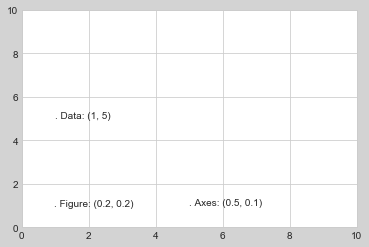

In [5]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData - значение по умолчанию, но мы все равно указываем его
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure)

Обратите внимание, что по умолчанию текст выравнивается по базовой линии и левому краю указанных координат, поэтому "." в начале каждой строки приблизительно отмечает здесь заданные координаты.

Координаты transData задают обычные координаты данных, соответствующие меткам на осях X и Y. Координаты transAxes задают местоположение, считая от нижнего левого угла системы координат (здесь — белый прямоугольник), в виде доли от размера системы координат. Координаты transFigure схожи с transAxes, но задают местоположение, считая от нижнего левого угла рисунка (здесь — серый прямоугольник) в виде доли от размера рисунка.

Отмечу, что, если поменять пределы осей координат, это повлияет только на координаты transData, а другие останутся неизменными:

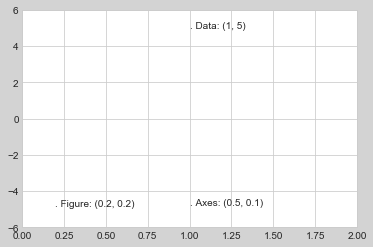

In [6]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

Наблюдать это поведение более наглядно можно путем интерактивного изменения пределов осей координат. При выполнении кода в блокноте этого можно добиться, заменив %matplotlib inline на %matplotlib notebook и воспользовавшись меню каждого из графиков для работы с ним.

## Стрелки и поясняющие надписи

Наряду с отметками делений и текстом удобной поясняющей меткой является простая стрелка.

Рисование стрелок в Matplotlib зачастую оказывается более сложной задачей, чем вы могли бы предполагать. Несмотря на существование функции plt.arrow(), использовать ее я бы не советовал: создаваемые ею стрелки представляют собой SVG-объекты, подверженные изменениям в зависимости от соотношения сторон графиков, поэтому результат редко оказывается соответствующим ожиданиям. Вместо этого я предложил бы воспользоваться функцией plt.annotate(). Она создает текст и стрелку, причем позволяет очень гибко задавать настройки для стрелки.

В следующем фрагменте кода мы используем функцию annotate с несколькими параметрами:


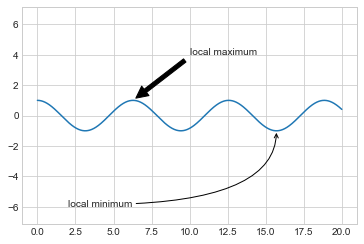

In [14]:
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6), 
            arrowprops=dict(arrowstyle='->', 
                            connectionstyle='angle3,angleA=0,angleB=-90'));

Стилем стрелки можно управлять с помощью словаря arrowprops с множеством параметров. Эти параметры отлично описаны в онлайн-документации библиотеки Matplotlib, поэтому вместо перечисления их я просто покажу несколько возможностей. Продемонстрируем часть имеющихся параметров на уже знакомом вам графике рождаемости:

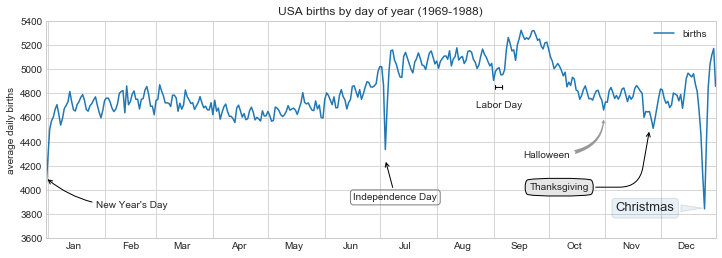

In [19]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)
# Добавляем на график метки
ax.annotate("New Year's Day", xy=('2012-1-1', 4100), xycoords='data', 
            xytext=(50, -30), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2"))
ax.annotate("Independence Day", xy=('2012-7-4', 4250), xycoords='data', 
            bbox=dict(boxstyle="round", fc="none", ec="gray"), 
            xytext=(10, -40), textcoords='offset points', ha='center', 
            arrowprops=dict(arrowstyle="->"))
ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center', 
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850), 
            xycoords='data', textcoords='data', 
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })
ax.annotate('Halloween', xy=('2012-10-31', 4600), xycoords='data', 
            xytext=(-80, -40), textcoords='offset points', 
            arrowprops=dict(arrowstyle="fancy", fc="0.6", ec="none", connectionstyle="angle3,angleA=0,angleB=-90"))
ax.annotate('Thanksgiving', xy=('2012-11-25', 4500), xycoords='data', 
            xytext=(-120, -60), textcoords='offset points', 
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"), 
            arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=80,rad=20"))
ax.annotate('Christmas', xy=('2012-12-25', 3850), xycoords='data', 
            xytext=(-30, 0), textcoords='offset points', size=13, ha='right', va="center", 
            bbox=dict(boxstyle="round", alpha=0.1), arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1));

# Задаем метки для осей координат
ax.set(title='USA births by day of year (1969-1988)', ylabel='average daily births')
# Размечаем ось X центрированными метками для месяцев
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));
ax.set_ylim(3600, 5400);

Вы видите, что спецификации стрелок и текстовых полей очень подробны. Благодаря этому мы можем создавать стрелки практически любого нужного нам вида. К сожалению, это также означает, что подобные элементы требуют отладки вручную — процесс, занимающий немало времени, если речь идет о создании графики типографского уровня качества! Наконец, отмечу, что использовать для представления данных продемонстрированную выше смесь стилей я отнюдь не рекомендую, она дана в качестве примера возможностей.

Дальнейшее обсуждение и примеры стилей стрелок и поясняющих надписей можно найти в галерее библиотеки Matplotlib по адресу http://matplotlib.org/examples/pylab_examples/annotation_demo2.html.